# **Final Project ML Clasification (HR Analytics Employee Promotion Data)**

**Table of content :**

1. Business Understanding
2. Data Understanding
3. EDA (Exploratory Data Analysis)
4. Dashboard
5. Data Preparation and Preprocessing
6. Modelling Experiments
7. Final Model Evaluation
8. Conclusion and Recommendation
9. Deployment

****

 Note : Berikan alasan mengapa menggunakan metode a b c di setiap keputusan modelling dll nya


## **1 Business Understanding**

### 1.1 Context
In a large multinational corporation (MNC) with 9 broad verticals across the organization, one of the critical challenges faced by the Human Resources (HR) department is identifying the right employees for promotion, particularly for managerial positions and below. Promotions are not just about filling higher positions; they are about placing the right talent in roles where they can lead, innovate, and contribute significantly to the organization’s success.

Traditionally, the final promotion decisions are announced only after a comprehensive evaluation process, which can sometimes be prolonged. This delay can create a bottleneck in the transition of employees into their new roles, resulting in missed opportunities for the company and potential dissatisfaction among employees who feel they are ready to take on more responsibilities but are held back by the slow process.

For a company of this scale, efficiently managing the promotion cycle is essential to maintaining a dynamic and motivated workforce. HR teams need to ensure that potential candidates are identified and prepared well in advance so that the transition to new roles is seamless. By doing so, the company can minimize disruptions, maintain productivity, and foster a culture of growth and development.

The complexity of managing promotions in such a large organization is further compounded by the need to consider various factors such as employee performance, leadership potential, alignment with organizational goals, and the ability to handle increased responsibilities. Therefore, the company requires a systematic approach to identify eligible candidates at specific checkpoints throughout the year, enabling a more agile and efficient promotion cycle.

### 1.2 Problem Statement
Given the importance of timely promotions in maintaining organizational efficiency and employee satisfaction, our main business concern is **how the company can streamline the promotion process for managerial positions and below** by identifying eligible candidates at critical checkpoints. This approach will allow the HR team to expedite the entire promotion cycle, ensuring that the right employees are promoted at the right time, and that transitions into new roles are smooth and efficient. 

To achieve this, the company needs to leverage data-driven insights from historical performance evaluations, employee feedback, and other relevant metrics. The goal is to create a predictive model that can identify potential candidates who are ready for promotion, allowing the HR team to proactively prepare them for their new roles. This will not only reduce delays in the promotion process but also enhance employee engagement and retention by providing clear and timely career advancement opportunities. The **main stakeholder of this project will be the HR team, particularly the HR managers responsible for overseeing promotions** across the various verticals within the organization.

### 1.3 Key Objectives and Goals

1. **Resource Optimization**: Optimize the allocation of resources such as training and development activities, focusing on employees most likely to be promoted, thus reducing unnecessary costs and time investments.
2. **Improved Promotion Accuracy**: Enhance the accuracy of promotion decisions to reduce the occurrence of promoting unfit candidates (False Positives) and missing out on deserving ones (False Negatives). This would result us to not lose our morale on deserving employees in which the chance they would leave the company could brings a greater loss on the company due to losing a promising employee and spend another budgets on recruitments. 

Because, statistically speaking, 82% of managers report they've promoted the wrong person. Our objective would be to minimze the mistake to at least 20% chance of mistaking a promotion. ([Reports of Wrong Promotion](https://www.linkedin.com/pulse/so-looks-like-youve-promoted-wrong-person-rosanna-nadeau-rcxle/))


### 1.4 Confusion Matrix Table

| **Actual vs Predicted**         | **Predicted: Promoted (Positive)** | **Predicted: Not Promoted (Negative)** | **Consequences**                                                                                                                                               |
|---------------------------------|------------------------------------|----------------------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **Actual: Promoted (Positive)** | True Positive (TP)                 | False Negative (FN)                    | **TP**: Deserving employees are correctly promoted, leading to higher motivation and retention.                                                               |
|                                 |                                    |                                        | **FN**: Deserving employees are not promoted, leading to potential dissatisfaction, increased attrition, and additional costs associated with hiring and training new employees. While also losing a promising empolyee. |
| **Actual: Not Promoted (Negative)** | False Positive (FP)                 | True Negative (TN)                      | **FP**: Employees who are not ready or deserving are promoted, leading to wasted promotion costs, time, and training resources, and potential disruption to team performance. |
|                                 |                                    |                                        | **TN**: Employees who are not ready for promotion are correctly not promoted, ensuring team stability and maintaining performance expectations, while also not wasting unecessary resource for their training.                |


### 1.5 Consequential Decision Analysis

#### Which is More Dangerous?
- **FN Risk**: FNs can lead to losing top talent, increased hiring and training costs, and demotivating high performers, which can be costly in both the short and long term.
- **FP Risk**: FPs result in wasted promotion costs, time, and training resources, and can negatively impact team performance and morale.

#### Impacts ?
- **Short-term**: FPs might seem more immediately costly due to the visible financial and resource impact of promoting the wrong candidates.
- **Long-term**: FNs can be more damaging over time as they can lead to attrition of key talent, higher hiring and training costs, and a culture where employees feel undervalued.

In many organizational contexts, FNs are considered more dangerous because retaining and recognizing top talent is crucial for long-term success. However, if the organization is particularly sensitive to resource efficiency and team dynamics, FPs might also be considered harmful.

Ultimately, the risk assessment depends on the organization's specific priorities and culture, with both FPs and FNs carrying significant consequences.

#### Consequences Simulation


The cost for hiring an employee in 2024 marks about the average of 4700 USD ([Hiring Cost](https://toggl.com/blog/cost-of-hiring-an-employee))

While the cost for a training is around 1200 USD ([Promotion Training Cost](https://hrdqstore.com/blogs/hrdq-blog/average-cost-employee-training-programs?srsltid=AfmBOoqozYO8rtjrIZhBng9T2_IyEzsYPTAHgtl2TyIWQvJYYMO5DJbF))

This results in our simulation calculation as :

**False Positive (FP) :** **1200** USD per employee

**False Negative (FN) :** 4700 + 1200 = **5900** USD per employee

Leaving us at a greater loss whereas FN occurs compared to FP.



### 1.6 Metric Evaluation Choices

In our case, where we need to balance between identifying the right candidates for promotion and minimizing the impact of incorrect predictions, the choice of the F-beta score depends on whether we want to prioritize reducing False Negatives or False Positives:

1. **False Negatives (FN) are more critical**:
   - If the impact of missing out on preparing a deserving candidate for promotion is high (e.g., leading to delays in role transition, inefficiencies), you should prioritize **Recall** over Precision.
   - Use F-beta with **( beta > 1 )** (e.g., 1.5 or 2). This will give more weight to Recall, focusing on reducing False Negatives.

2. **False Positives (FP) are more critical**:
   - If the impact of preparing someone for promotion who isn't actually going to be promoted is more problematic (e.g., wasting resources, causing potential disappointment), you should prioritize **Precision** over Recall.
   - Use F-beta with **( beta < 1 )** (e.g., 0.5). This will give more weight to Precision, focusing on reducing False Positives.

Given the description of our scenario, it seems that **FN** is more consequential than **FP**, Resulting **F-beta** score of **2 (Two)** as our prefered choice for the balance between recall and precision.

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score, learning_curve
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier, VotingClassifier
from sklearn.metrics import classification_report, accuracy_score, fbeta_score, roc_auc_score, make_scorer, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import ADASYN, SMOTE
from imblearn.combine import SMOTEENN
from sklearn.feature_selection import RFECV

# Importing Additional Libraries
import scipy.stats as stats
import joblib
import time
import shap

# Plotting Utilities
import seaborn as sns
import matplotlib.pyplot as plt

# a desperate attempt to remove all those spam outputs
import warnings
warnings.filterwarnings("ignore")


### 2.1 Data Distribution

In [2]:
train_data = pd.read_csv('train.csv')

In [3]:
train_data

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,45,0


In [4]:
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won?           54808 non-null  int64  
 11  avg_training_score    54808 non-null  int64  
 12  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 5.4+ MB
None


From all the Info above, It is shown that :

| Column Name | Data Type | Description |
| --- | --- | --- |
| employee_id            | Integer | Unique ID for employee |
| department             | String |  Department of employee|
| region                 | String | Region of employment (unordered) |
| education              | String | Education Level |
| gender                 | String | Gender of Employee |
| recruitment_channel    | String | Channel of recruitment for employee |
| no_of_trainings        | Integer | No of other trainings completed in previous year on soft skills, technical skills etc |
| age                    | Integer | Age of Employee |
| previous_year_rating   | Float |  Employee Rating for the previous year |
| length_of_service      | Integer | Length of service in years |
| awards_won?            | Integer | if awards won during previous year then 1 else 0 |
| avg_training_score     | Integer | Average score in current training evaluations |
| is_promoted            | Integer |  (Target) Recommended for promotion |

The Train Dataset contains 54808 rows with 13 columns. 5 of the columns are Objects and the rest 8 columns are numerical (including our target features)

Since our main purpose is to classify whether a potential promotee at checkpoint in the test set will be promoted or not after the evaluation process, our attribute **Target** will be `is_promoted` while the rest would be our **Features**

### 2.2 Statistical Summary

In [5]:
display(train_data.describe(), train_data.describe(include=['object']))

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,99.000000,1.000000


,department,region,education,gender,recruitment_channel
count,54808,54808,52399,54808,54808
unique,9,34,3,2,3
top,Sales & Marketing,region_2,Bachelor's,m,other
freq,16840,12343,36669,38496,30446


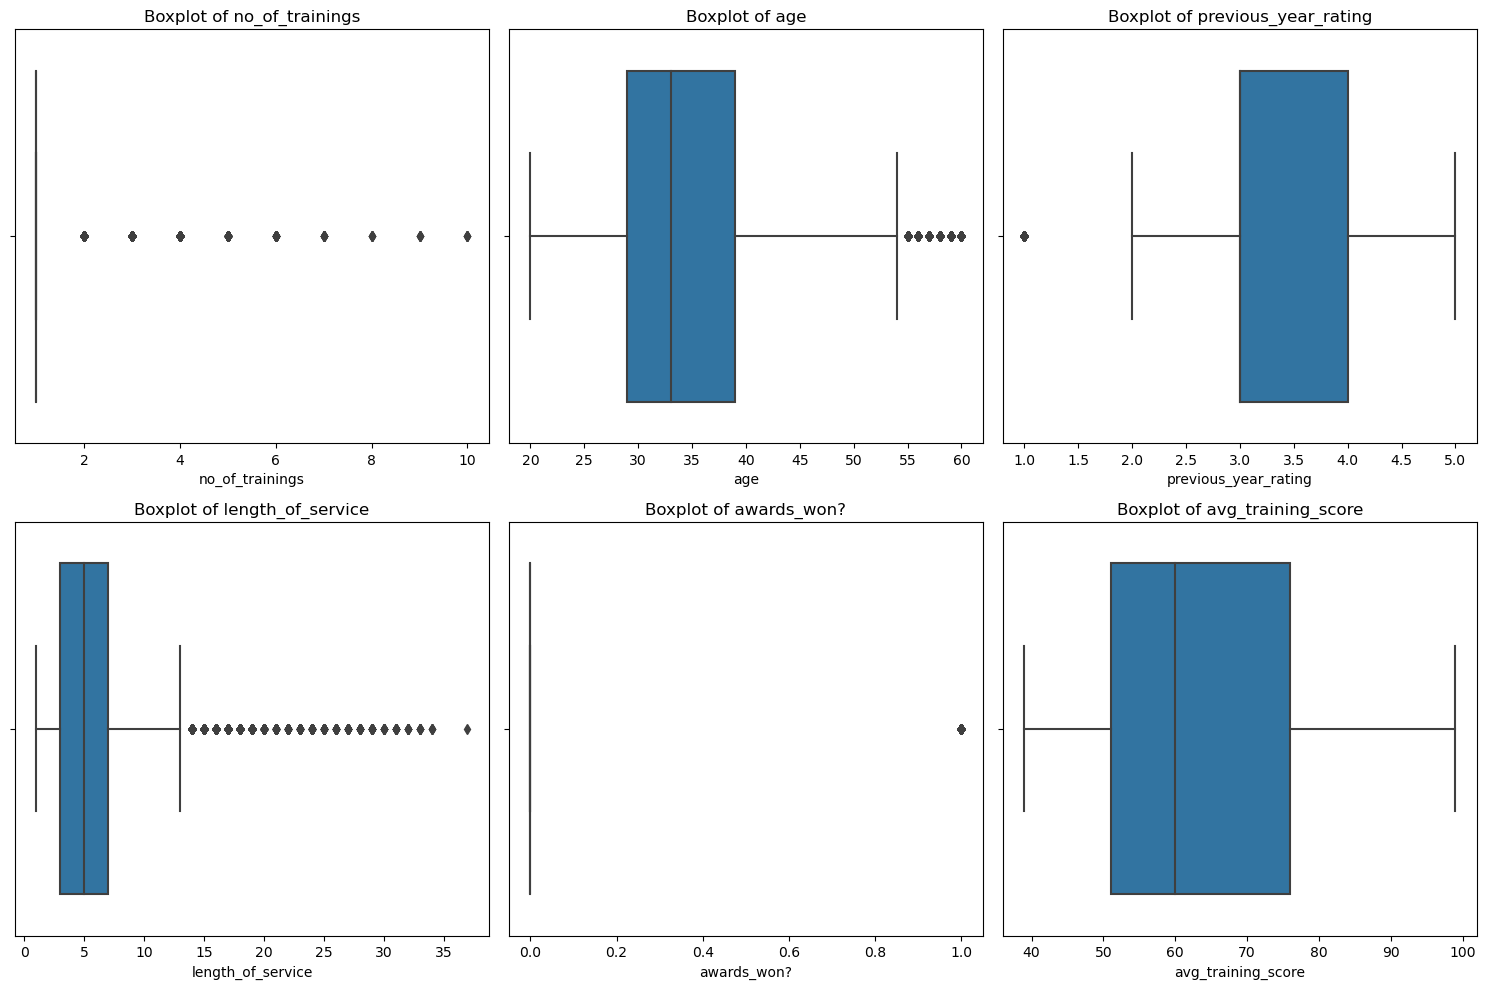

In [6]:
# Select numeric features, excluding 'employee_id' and 'is_promoted' because employee ID is all unique, and is promoted is our target
numeric_features = train_data.select_dtypes(include=['int64', 'float64']).columns
numeric_features = numeric_features.drop(['employee_id', 'is_promoted'])  # Exclude employee_id and is_promoted

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

axes = axes.flatten()

for i, feature in enumerate(numeric_features):
    sns.boxplot(data=train_data, x=feature, ax=axes[i])
    axes[i].set_title(f'Boxplot of {feature}')

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

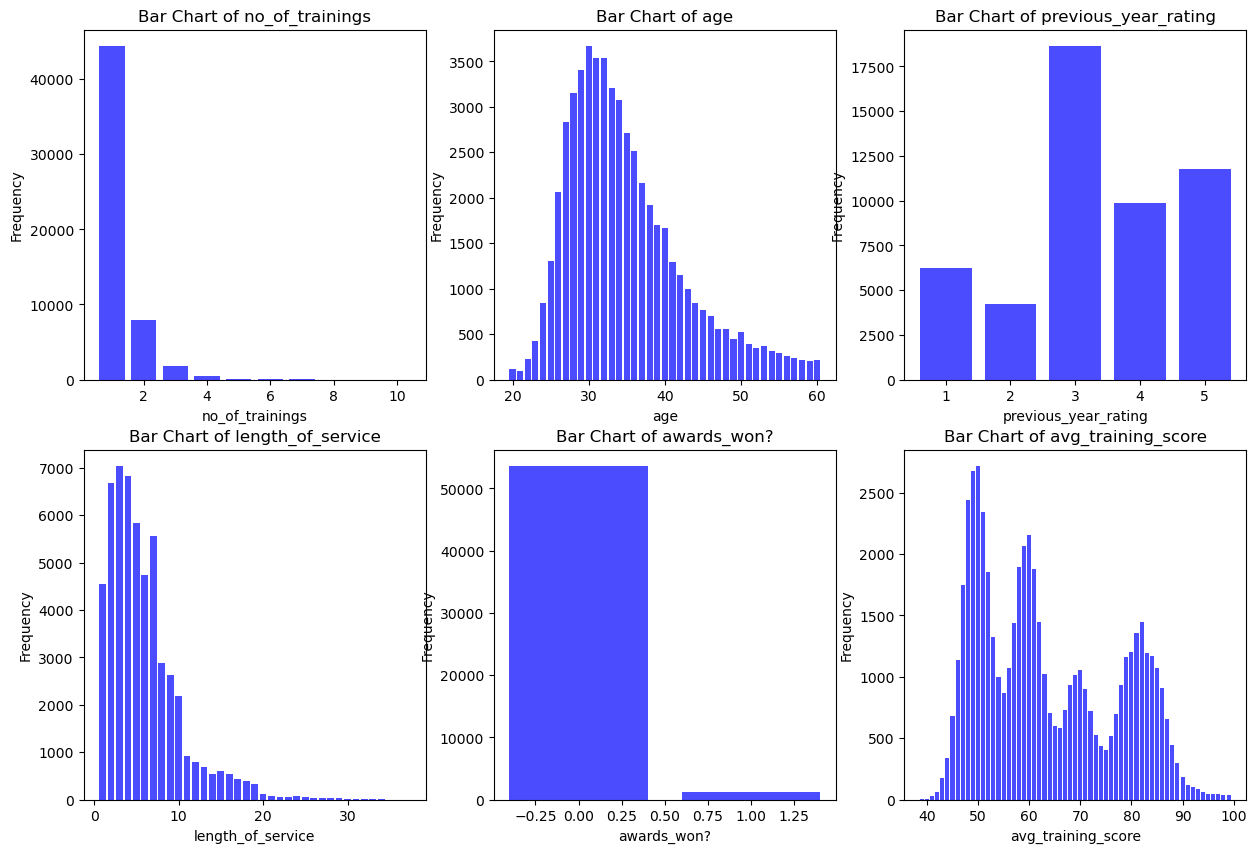

In [7]:
# This is the barchart version

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

axes = axes.flatten()

for i, feature in enumerate(numeric_features):
    feature_counts = train_data[feature].value_counts().sort_index()
    axes[i].bar(feature_counts.index, feature_counts.values, color='blue', alpha=0.7)
    axes[i].set_title(f'Bar Chart of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')


From the bar charts presented, we can infer the following observations about the dataset :

1. **Number of Trainings (`no_of_trainings`)**: The majority of employees have completed very few trainings, with a significant number having only 1 or 2 trainings. Very few employees have undergone more than 4 trainings in the previous year.

2. **Age (`age`)**: The age distribution shows a peak around the early 30s, with the number of employees gradually decreasing as the age increases. This suggests that the workforce is relatively young, with most employees in their late 20s to early 30s.

3. **Previous Year Rating (`previous_year_rating`)**: Ratings are heavily concentrated around 3, which may indicate an average or typical performance rating for most employees. There are fewer employees with ratings of 1 or 2, and a moderate number with higher ratings of 4 or 5.

4. **Length of Service (`length_of_service`)**: Most employees have a length of service of fewer than 10 years, with a steep decline in the number of employees as the length of service increases. This could indicate a relatively young workforce in terms of tenure as well.

5. **Awards Won (`awards_won?`)**: The vast majority of employees have not won any awards in the previous year, as indicated by the bar showing zero awards. Very few employees have won any awards.

6. **Average Training Score (`avg_training_score`)**: The average training score distribution shows multiple peaks, suggesting there are several groups of employees with distinct performance levels in training. The scores range from around 40 to 90, with some clusters around the mid-50s, mid-60s, and mid-80s.

#### Overall Insights :
- The workforce seems to be relatively young both in terms of age and length of service.
- There is a strong concentration of employees with average performance ratings, which might be indicative of a standard evaluation process.
- Training participation is low, and awards are rare, which might suggest opportunities for increasing employee engagement in developmental activities.
- The variation in training scores suggests diversity in skill levels or training effectiveness among employees.

### 2.3 Missing Values and Duplicates

In [8]:
# Checking for missing values
train_missing_values = train_data.isnull().sum()

# Checking for duplicates
train_duplicates = train_data.duplicated().sum()

In [9]:
train_missing_values

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [10]:
train_duplicates

0

No duplicates exists on our Dataset. Therefore, there is no need to analyze further.

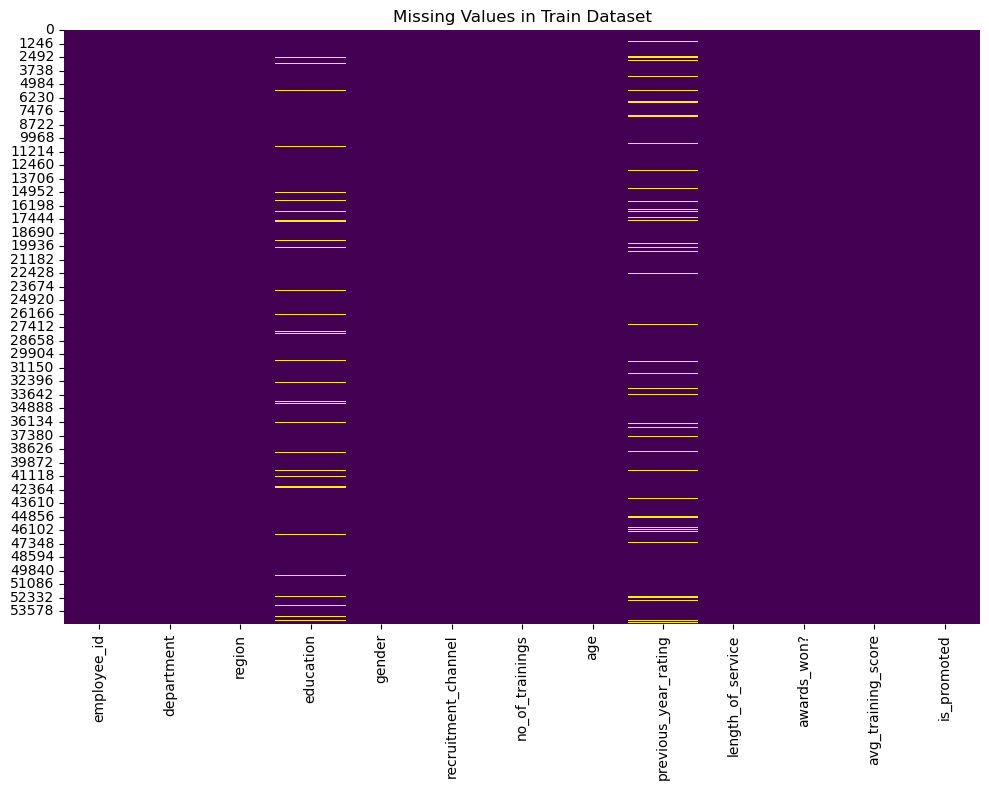

In [11]:
# Calculate the missing values for the train dataset
missing_train = train_data.isnull().sum()

# Plot the missing values as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(train_data.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values in Train Dataset")
plt.tight_layout()
plt.show()


In [12]:
# Add a column to indicate where missing values are present in the previous_year_rating column
train_data['missing_previous_year_rating'] = train_data['previous_year_rating'].isnull()

# Check correlations between missing indicator and other columns in the train dataset
train_corr = train_data.corr()

# Select the relevant correlations
missing_corr_train = train_corr['missing_previous_year_rating'].drop('missing_previous_year_rating')

missing_corr_train


employee_id             0.002018
no_of_trainings         0.026745
age                    -0.295318
previous_year_rating         NaN
length_of_service      -0.325408
awards_won?             0.000202
avg_training_score     -0.000626
is_promoted            -0.003033
Name: missing_previous_year_rating, dtype: float64

To determine if the missing values in the dataset are Missing Completely at Random (MCAR), Missing at Random (MAR), or Missing Not at Random (MNAR), we need to perform some analysis:

1. **Missing Completely at Random (MCAR):** The missingness is completely random and independent of both observed and unobserved data.
2. **Missing at Random (MAR):** The missingness is related to the observed data but not the missing data itself.
3. **Missing Not at Random (MNAR):** The missingness is related to the unobserved data, meaning the missing data itself has a pattern.

#### Steps to Analyze:

1. **Visual Inspection and Correlation with Other Variables:**
   - Check if the missing values correlate with any other variables in the dataset.

2. **Little’s MCAR Test:**
   - This is a statistical test to check if data is MCAR. Unfortunately, this test isn't directly available in Python’s standard libraries, so a detailed analysis is needed.

3. **Pattern Analysis:**
   - Analyze the pattern of missing data, and see if it's related to any other variables.

Let's begin by analyzing the correlation of missing values with other variables and checking the patterns.

The correlation analysis between the missing values in the `previous_year_rating` column and other variables in the train dataset shows the following:

- **Age and Length of Service:** Both have a moderate negative correlation with the missingness (`age`: -0.295, `length_of_service`: -0.325). This suggests that younger employees or those with shorter service lengths are more likely to have missing `previous_year_rating`.
- **No significant correlation** was found between missing values and other numeric variables, suggesting that the missingness might be related to specific characteristics of the employees.

#### Interpretation:
- The presence of correlations with `age` and `length_of_service` suggests that the data might be **Missing at Random (MAR)**, as the missingness is related to observed data.

To check if the missing values are definitively MAR, a more detailed analysis or domain knowledge might be needed. However, based on this initial analysis, the missing data is likely not Missing Completely at Random (MCAR) but rather Missing at Random (MAR).

From the exploration of data and domain knowledge, we found that :

1. missing `previous_year_rating` is caused by any rows that has only **1 Year** of `length_of_service`

2. Based from our assumptions, the reason that causes `education` column to be missing is the employee did not specify their education, or the data was forgotten to be filled. This assumption was realized because for the uneducated or below degree, it is already written as *below secondary*.


In [13]:
# Analyze correlation with missingness in education by creating a binary indicator for missing values
train_data['education_missing'] = train_data['education'].isnull().astype(int)

# Calculate correlations with the new 'education_missing' column
missing_correlations = train_data.corr()['education_missing'].sort_values(ascending=False)

missing_correlations


education_missing               1.000000
missing_previous_year_rating    0.068744
employee_id                     0.002404
awards_won?                     0.000106
no_of_trainings                -0.024470
is_promoted                    -0.026521
previous_year_rating           -0.032182
length_of_service              -0.073312
avg_training_score             -0.083869
age                            -0.107348
Name: education_missing, dtype: float64

#### Interpretation:

1. The weak correlations overall suggest that the missing education data is not strongly related to any of these features.

2. The slightly stronger negative correlation with age could indicate that younger employees are slightly more likely to have missing education data, but the correlation is still weak.

And because of this, we have decided on how to treat our missing values. By doing :

1. Fill in all the missing values from `previous_year_rating` with ***0 (Zero)*** because as it is known by now, those missing values are the result of no previous year the employee had worked since it is their first year of working. Thus resulting of no rating from the previous year

2. Fill in all the missing values from `education` with ***unspecified*** text. The reason is as stated from our explanation just above this set of markdown.

In [14]:
# Fill missing values for previous_year_rating with 0
train_data['previous_year_rating'].fillna(0, inplace=True)

# Fill missing values for education with 'unspecified'
train_data['education'].fillna('unspecified', inplace=True)

# Verify the transformations by checking if there are any missing values left
missing_values_train = train_data.isnull().sum()

In [15]:
missing_values_train

employee_id                     0
department                      0
region                          0
education                       0
gender                          0
recruitment_channel             0
no_of_trainings                 0
age                             0
previous_year_rating            0
length_of_service               0
awards_won?                     0
avg_training_score              0
is_promoted                     0
missing_previous_year_rating    0
education_missing               0
dtype: int64

In [16]:
# Drop the 'missing_previous_year_rating' and 'missing_education' columns
train_data.drop(['missing_previous_year_rating', 'education_missing'], axis=1, inplace=True)


### 2.4 Outliers, Inconsistent and Rare Values

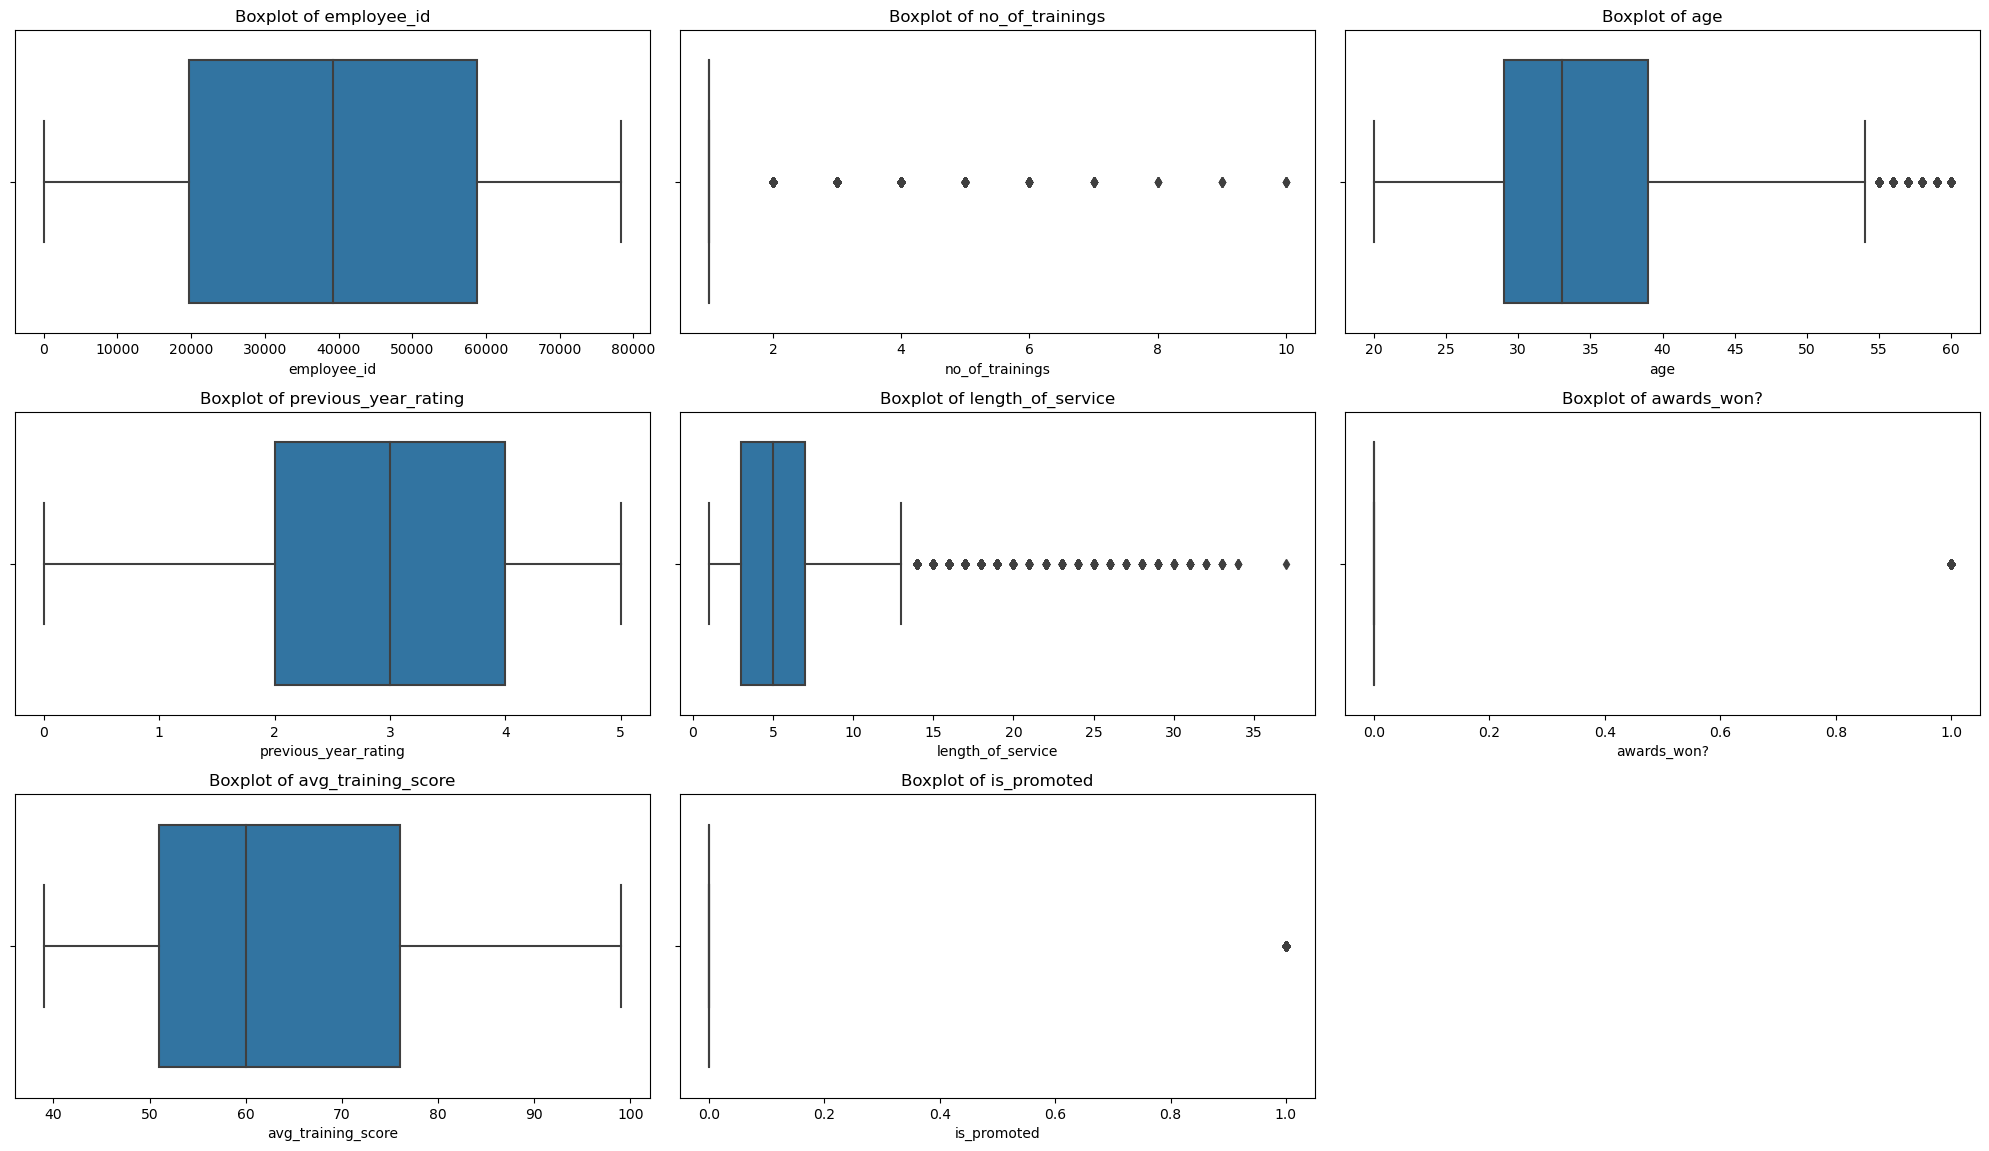

In [17]:
# Select numeric columns for outlier detection
numeric_columns_train = train_data.select_dtypes(include=['float64', 'int64']).columns

# Plot boxplots for numeric columns to detect outliers
plt.figure(figsize=(20, 15))
for i, column in enumerate(numeric_columns_train, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(data=train_data, x=column)
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()


The image we provided contains multiple boxplots representing various features related to employee data. Here's what we can infer from each boxplot :

1. **Employee ID**: The boxplot is spread widely, showing that employee IDs are distributed evenly without any significant outliers. This is expected since employee ID is typically a unique identifier and doesn’t have inherent value in terms of distribution.

2. **Number of Trainings**: The boxplot shows a concentration at lower numbers of trainings, with several outliers at higher numbers. This suggests that most employees undergo a small number of training sessions, but a few have undergone significantly more.

3. **Age**: The boxplot for age shows a relatively symmetric distribution centered around the late 20s to early 30s. There are some outliers at both ends, particularly at the older end (above 50), indicating a few older employees.

4. **Previous Year Rating**: The ratings are mostly centered around 3-4, with a few outliers on the lower end. This suggests that most employees are rated moderately to highly, but some have significantly lower ratings.

5. **Length of Service**: This boxplot is skewed towards shorter lengths of service with a concentration around the first few years. There are significant outliers representing employees with much longer tenures, up to 35 years.

6. **Awards Won**: This plot is highly skewed with most employees not winning any awards. There are a few outliers representing employees who have won awards.

7. **Average Training Score**: The distribution of training scores is fairly symmetric and centered around 60-70, with no significant outliers. This indicates most employees perform similarly in training sessions.

8. **Is Promoted**: The boxplot shows a strong skew towards non-promotion (0), with very few employees getting promoted (1). This indicates that promotions are relatively rare in this dataset.

### General Observations:
- There are clear patterns where most data points are concentrated around certain values, with outliers indicating deviations.
- Promotions seem to be rare, and factors such as age, previous year rating, length of service, and number of awards may play a role in determining who gets promoted.

In [18]:
# check cardinality
(train_data.select_dtypes(include=['object'])
 .nunique()
 .reset_index()
 .rename(columns={0:'count'}))

,index,count
0,department,9
1,region,34
2,education,4
3,gender,2
4,recruitment_channel,3


In [19]:
# check cols with high nunique except education since we have cleaned and explored that one
print(train_data['department'].unique())
print(train_data['region'].unique())
print(train_data['recruitment_channel'].unique())

['Sales & Marketing' 'Operations' 'Technology' 'Analytics' 'R&D'
 'Procurement' 'Finance' 'HR' 'Legal']
['region_7' 'region_22' 'region_19' 'region_23' 'region_26' 'region_2'
 'region_20' 'region_34' 'region_1' 'region_4' 'region_29' 'region_31'
 'region_15' 'region_14' 'region_11' 'region_5' 'region_28' 'region_17'
 'region_13' 'region_16' 'region_25' 'region_10' 'region_27' 'region_30'
 'region_12' 'region_21' 'region_8' 'region_32' 'region_6' 'region_33'
 'region_24' 'region_3' 'region_9' 'region_18']
['sourcing' 'other' 'referred']


In [20]:
pd.DataFrame({
    'ColumnName': train_data.select_dtypes(include='O').columns.values.tolist(),
    'Nrow': train_data.select_dtypes(include='O').shape[0],
    'UniqueValue': train_data.select_dtypes(include='O').nunique().tolist(),
})

,ColumnName,Nrow,UniqueValue
0,department,54808,9
1,region,54808,34
2,education,54808,4
3,gender,54808,2
4,recruitment_channel,54808,3


##### Rare Values

In [21]:
# Identify categorical columns
categorical_columns = train_data.select_dtypes(include=['object']).columns

# Calculate frequency of unique values in each categorical column
rare_values_report = {}
for column in categorical_columns:
    value_counts = train_data[column].value_counts(normalize=True)
    rare_values_report[column] = value_counts[value_counts < 0.01]  # considering rare if less than 1% frequency

rare_values_report


{'department': Series([], Name: department, dtype: float64),
 'region': region_24    0.009269
 region_12    0.009123
 region_9     0.007663
 region_21    0.007499
 region_3     0.006313
 region_34    0.005328
 region_33    0.004908
 region_18    0.000566
 Name: region, dtype: float64,
 'education': Series([], Name: education, dtype: float64),
 'gender': Series([], Name: gender, dtype: float64),
 'recruitment_channel': Series([], Name: recruitment_channel, dtype: float64)}

In our dataset, we observed that certain categories within the `region` column had very few occurrences, representing less than 1% of the total data. Handling these rare values is crucial to ensure that the model is robust and not overly influenced by noise or sparsity issues.

#### Strategy: Grouping Rare Values
We chose to group the rare values in the `region` column under a single category labeled "Other." This decision was based on several key considerations:

- **Preservation of Data**: By grouping rather than removing these rare categories, we maintained the dataset's size and avoided losing potentially valuable information.
- **Reduction of Noise**: Grouping reduces the number of categories, simplifying the model and making it less prone to overfitting. This leads to a model that generalizes better to new data.
- **Avoiding Sparse Data Issues**: Rare categories can create sparse data problems, particularly in machine learning algorithms that do not handle categorical data natively. Grouping ensures that each category has sufficient representation.
- **Improved Model Interpretability**: A model with fewer, more meaningful categories is easier to interpret, making it more useful for decision-making.

After grouping the rare categories, the `region` column now has a new category "Other," which includes all the regions with less than 1% frequency in the dataset. This adjustment helps in managing the complexity of the model while retaining important information.


In [29]:
# # Group rare categories in the 'region' column into a single 'Other' category
# train_data['region'] = train_data['region'].apply(lambda x: 'Other' if x in rare_values_report['region'] else x)

# # Verify the changes by checking the unique values in the 'region' column
# unique_regions = train_data['region'].value_counts()
# unique_regions


region_2     12343
region_22     6428
region_7      4843
region_15     2808
Other         2777
region_13     2648
region_26     2260
region_31     1935
region_4      1703
region_27     1659
region_16     1465
region_28     1318
region_11     1315
region_23     1175
region_29      994
region_32      945
region_19      874
region_20      850
region_14      827
region_25      819
region_17      796
region_5       766
region_6       690
region_30      657
region_8       655
region_10      648
region_1       610
Name: region, dtype: int64

In [22]:
# Calculate the suitable number of bins using the Sturges' formula, which is often used for equal-frequency binning
# Sturges' formula: k = 1 + log2(N)
num_rows = len(train_data)
num_bins = int(np.ceil(1 + np.log2(num_rows)))

# Perform the binning operation
train_data['region_binned'] = pd.qcut(train_data['region'].rank(method='first'), q=num_bins, labels=[f'Bin_{i+1}' for i in range(num_bins)])

# Check the frequency distribution of the newly created bins
binned_frequencies = train_data['region_binned'].value_counts().sort_index()
binned_frequencies


Bin_1     3224
Bin_2     3224
Bin_3     3224
Bin_4     3224
Bin_5     3224
Bin_6     3224
Bin_7     3224
Bin_8     3224
Bin_9     3224
Bin_10    3224
Bin_11    3224
Bin_12    3224
Bin_13    3224
Bin_14    3224
Bin_15    3224
Bin_16    3224
Bin_17    3224
Name: region_binned, dtype: int64

In [23]:
# Display the actual region names that fall into each bin
region_bin_mapping = train_data.groupby('region_binned')['region'].unique()

region_bin_mapping

# Coba pakai KNN (opsi ada equal frequency and width. yg skrng kita gunakan yg equal frequency)


region_binned
Bin_1     [region_1, region_11, region_13, region_10, re...
Bin_2                                [region_14, region_13]
Bin_3                     [region_15, region_16, region_14]
Bin_4     [region_19, region_2, region_17, region_18, re...
Bin_5                                            [region_2]
Bin_6                                            [region_2]
Bin_7                                            [region_2]
Bin_8                      [region_20, region_21, region_2]
Bin_9                                [region_22, region_21]
Bin_10                                          [region_22]
Bin_11    [region_23, region_26, region_25, region_24, r...
Bin_12                               [region_27, region_26]
Bin_13    [region_29, region_28, region_30, region_3, re...
Bin_14                    [region_31, region_32, region_30]
Bin_15    [region_34, region_4, region_5, region_6, regi...
Bin_16                                 [region_7, region_6]
Bin_17                    

In [24]:
train_data

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted,region_binned
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0,Bin_16
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0,Bin_9
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0,Bin_4
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0,Bin_11
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0,Bin_11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,78,0,Bin_3
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,56,0,Bin_13
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,0,79,0,Bin_1
54806,13614,Sales & Marketing,region_9,unspecified,m,sourcing,1,29,1.0,2,0,45,0,Bin_17
